<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 10** - Oct 10, 2016

- Classification problems
- Nearest Neighbors (NN, $k$-NN)
- Naive Bayes Classifier

<hr/>

<h1><font color="darkblue">Classification</font></h1>

- Based on a **training set** of labeled points, assign class labels to unknown vectors in the **query set**.  

> **Training set**

>$T = \big\{ (x_i, C_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $C_i$ is the known class membership 

> **Query set**

>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$ 

> For example,
> blood tests ($x$) and sick/healty ($C$) - we want to predict if a new patient is sick based on the available measurements

- Similar to regression but with discrete categories to classify into...

### Classification Methods

- $k$-NN
- Naive Bayes
- Linear Discriminant Analysis
- Logistic regression
- Decisions trees
- Random forests
- Support Vector Machines

### The Iris Dataset

We'll use this data set available in [scikit-learn](http://scikit-learn.org/stable/index.html), see [this](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) page for details

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import datasets

iris = datasets.load_iris()

[k for k in iris]   #按个读取iris

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
print iris.DESCR   #describe

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], 
       dtype='|S10'))

In [8]:
print iris.data.shape

# have a peek
print iris.data[:5]
print iris.target[:5]

(150L, 4L)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0]


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


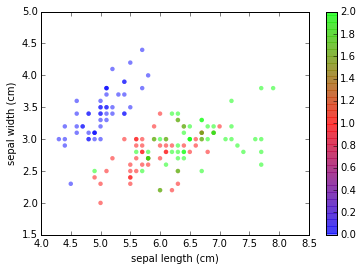

In [6]:
# plot two features
i,j = 0,1
plt.scatter(iris.data[:,i], iris.data[:,j], edgecolor='none', 
            c=iris.target, cmap=cm.brg, alpha=0.5); 
colorbar();
xlabel(iris.feature_names[i]);
ylabel(iris.feature_names[j]);

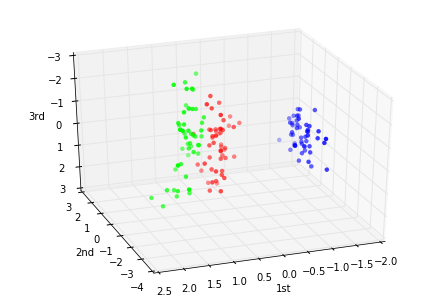

In [12]:
# see also http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# whiten the data and use top 3 components
b = PCA(n_components=3,whiten=True).fit_transform(iris.data)

# 3D plot
fig = plt.figure(figsize=(6,4))   #图像区域大小
ax = Axes3D(fig, elev=-150, azim=110)   #创建一个三维坐标系
ax.scatter(b[:,0], b[:,1], b[:,2], c=iris.target,
           cmap=plt.cm.brg, edgecolor='none')
ax.set_xlabel("1st");
ax.set_ylabel("2nd");
ax.set_zlabel("3rd");


### Nearest Neighbor


- Assign label or value of nearest neighbor (NN) in the training set

> Simple but powerful

> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>


In [23]:
# naive and very slow nearest neighbor search
# for illustration purposes only...
import datetime as dt
start = dt.datetime.now()

X = iris.data #个体特征数据
y = iris.target   #个体类别

print 'Unique classes', np.unique(iris.target)   #不同类别显示为向量

y_pred = -1 * np.ones(y.size)   #与个体数相等的-1

# loop on query set
for i in arange(y.size): 
    
    d2min = 1e99  # something large
    
    # loop on training set,找到除了自己之外最接近的
    for j in arange(y.size):
        if i != j:               # leave one out
            d = X[i,:] - X[j,:]  # diff vector,i个体-j个体
            d2 = d.dot(d)        # its length squared，向量点乘向量
            if d2 < d2min:       # check if closer
                d2min = d2       # save it 
                y_pred[i] = y[j]

print 'Elapsed time', dt.datetime.now() - start

print ("Number of mislabeled points out of a total %d points: %d" 
       % (iris.target.size, (y!=y_pred).sum()))

# write a faster version of this

Unique classes [0 1 2]
Elapsed time 0:00:00.149000
Number of mislabeled points out of a total 150 points: 6


### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" <br/> possibly with weighting


> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>

- Using $k$ instead of a distance cutoff helps with large density contrasts



In [25]:
from sklearn import neighbors

X = iris.data[:,:2] # using only 2 features for each
y = iris.target

start = dt.datetime.now()
clf = neighbors.KNeighborsClassifier(15)
y_pred = clf.fit(X,y).predict(X)

print "Elapsed time", dt.datetime.now()-start
print("Number of mislabeled points out of a total %d points: %d"
      % (iris.target.size, (iris.target!=y_pred).sum()))

Elapsed time 0:00:00.004000
Number of mislabeled points out of a total 150 points: 29


### Where did we cheat?

- Can you spot the problem with the code above?

### Evaluate on a grid

- Create a mesh of points with resolution $h$
- Plot classification results for each grid point
- Visualize results
- Do it for different $k$NN weighting schemes

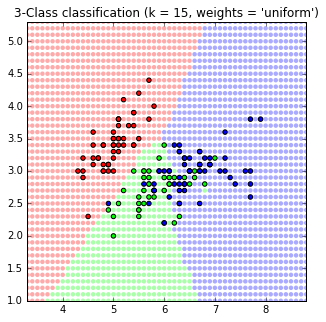

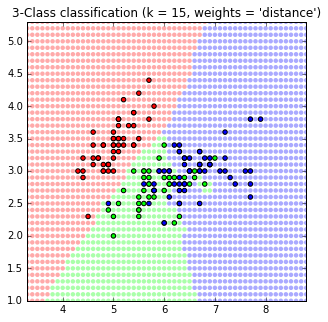

In [41]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]  # we only take the first two features
y = iris.target

h = .1  # step size in the mesh


for weights in ['uniform', 'distance']:   #weights可以取两个值，用于作为参数值
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)   #kNN法
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))   #产生网格
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if True:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

### Exercise / Unhomework 

- Which two features work best to predict the classes of the iris dataset?
- How much better than using all features

### Other examples

More [exercises](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier) such as classification of [digits](http://scikit-learn.org/stable/auto_examples/exercises/digits_classification_exercise.html) are available at http://scikit-learn.org

### Meaningful Distance?

- Need a distance function

> E.g., use Euclidean distance in $\mathbb{R}^d$

- Problem with different features and units

> In practice **centering** and **scaling** often helps <br/>
> Arguably, black art...


### Curse of Dimensionality

- Everybody is lonely in high dimensions

> Surface / Volume ratio grows <br/>as function of $d$, the dimension
